In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, distinct

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
# `automap_base()` automatically generates  Python classes from Postgresql DB tables
Base = automap_base()

# Base class reflects the tables
Base.prepare(engine, reflect = True)

/var/folders/p7/44v4jhr91plb0p3405m1crv80000gn/T/ipykernel_52461/729627886.py:6: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect = True)


In [7]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)


# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(Measurement.date)).first()[0]
most_recent_date

'2017-08-23'

<Axes: xlabel='Date', ylabel='Inches of Precipitation'>

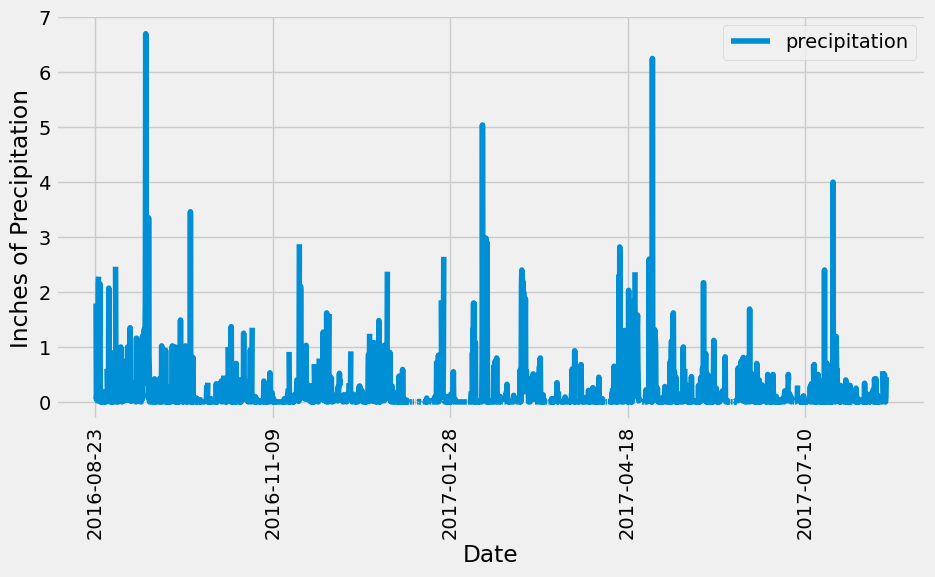

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
previous_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
last_12 = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= previous_date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
resultdf = pd.DataFrame(last_12, columns=['date','precipitation'])
resultdf.set_index('date',  inplace=True)

# Sort the dataframe by date
resultdf = resultdf.sort_values(by='date')
resultdf.head()

# Use Pandas Plotting with Matplotlib to plot the data
resultdf.plot(rot=90, xlabel = 'Date', ylabel='Inches of Precipitation', figsize=(10,5))

In [15]:
# Use Pandas to calculate the summary statistics for the precipitation data
resultdf.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [17]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(func.count(Station.station)).first() [0]
station_count

9

In [18]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_list = session.query(Measurement.station, func.count(Measurement.station)).\
                    group_by(Measurement.station).\
                    order_by(func.count(Measurement.station).desc()).all()
station_list

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [27]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
min_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519281').first()
max_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281').first()
avg_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').first()

print(f"Lowest temperature: {min_temp [0]} degrees") 
print(f"Highest temperature: {max_temp [0]} degrees")
print(f"Average temperature: {avg_temp [0]:.1f} degrees")

Lowest temperature: 54.0 degrees
Highest temperature: 85.0 degrees
Average temperature: 71.7 degrees


Text(0.5, 0, 'Temperature')

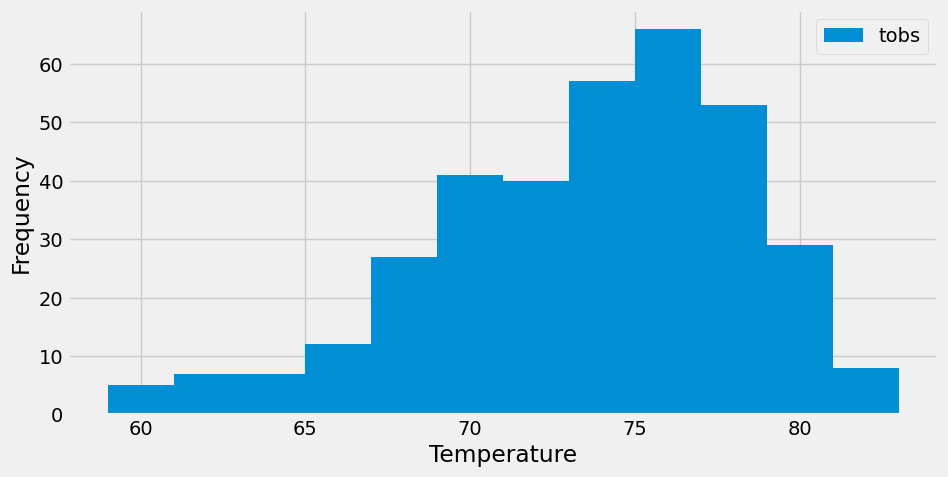

In [31]:
from pandas.plotting import table

# Using the most active station id = USC00519281
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).\
        filter(Measurement.station == 'USC00519281').\
        filter(Measurement.date >= previous_date).all()

results_df = pd.DataFrame(results, columns=['tobs'])
#results_df.head()

results_df.plot.hist(bins=12, figsize=(10, 5))
plt.xlabel('Temperature')

# Close Session

In [24]:
# Close Session
session.close()